In [1]:
import pandas as pd
import numpy as np

In [2]:
scales = pd.DataFrame({
    'nominals': ['cinsiyet', 'meslek', 'duygular', 'film_isimleri'],
    'ordinals': ['askeri_rutbeler', 'akademik_unvanlar', 'anket_siklari', 'yas_gruplari'],
    'interval': ['sicaklik_degerleri', 'oss_puani', 'ph_degeri', 'tarihler'],
    'ratio': ['yas', 'maas', 'boy', 'kilo']
})

scales

,nominals,ordinals,interval,ratio
0,cinsiyet,askeri_rutbeler,sicaklik_degerleri,yas
1,meslek,akademik_unvanlar,oss_puani,maas
2,duygular,anket_siklari,ph_degeri,boy
3,fiml_isimleri,yas_gruplari,tarihler,kilo


## 2 - Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım. 

* Kolonlar : radius_mean, area_mean, compactness_mean

In [3]:
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
soru2_df = dataset.copy()

Kolonlar = ['radius_mean', 'area_mean', 'compactness_mean']

In [5]:
import numpy as np
def find_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    iqr = q3 - q1

    LCL = q1 - (1.5 * iqr)
    UCL = q3 - (1.5 * iqr)

    length = len(df)
    lowers = sum(df[column] < LCL)
    uppers = sum(df[column] < UCL)
    if lowers > 0:
        print(f'{column} degiskeninde bulunan degerlerin %{100 * np.round((lowers / length), 2)}\'i alt limitin altinda kalarak outlier ilan edildi.')
    if uppers > 0:
        print(f'{column} degiskeninde bulunan degerlerin %{100 * np.round((uppers / length), 2)}\'i alt limitin uzerinde kalarak outlier ilan edildi.')
    if (lowers+uppers != 0 ):
        print(f'{column} degerlerin %{100 * np.round(((length-uppers-lowers) / length), 2)} tanesi q1: {q1} ve q3: {q3} arasinda kalmistir.\n')
    else:
        print(f"{column} degiskeninde hicbir outlier bulunmamaktadir \n")

* Dro islemi icin outlier degerlerin indexlerini kaydettigim fonksiyon aslinda alttaki, usttekinin alt kumesi olmasina ragmen anlasilir olmasi icin farkli bir fonksyiton olarak yazioyrum

In [6]:
def find_outlier_indexes(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    std_ = df[column].std()

    iqr = q3 - q1

    LCL = q1 - (1.5 * std_)
    UCL = q3 +(1.5 * std_)

    [outlier_list.append(ind) for ind in df[column][(df[column] < LCL) | (df[column] > UCL)].index]
    print(len(outlier_list))
    

In [7]:
outlier_list = []
for i in Kolonlar:
    find_outlier(soru2_df, i)
    find_outlier_indexes(soru2_df, i)

outlier_list = list(set(outlier_list)) # bu islem duplicate degerleri elimine ediyor

print(f'outlier orani {np.round((len(outlier_list) / len(soru2_df)), 3) * 100} %')

radius_mean degiskeninde bulunan degerlerin %5.0'i alt limitin uzerinde kalarak outlier ilan edildi.
radius_mean degerlerin %95.0 tanesi q1: 11.7 ve q3: 15.78 arasinda kalmistir.

22
area_mean degiskeninde bulunan degerlerin %2.0'i alt limitin uzerinde kalarak outlier ilan edildi.
area_mean degerlerin %98.0 tanesi q1: 420.3 ve q3: 782.7 arasinda kalmistir.

51
compactness_mean degiskeninde bulunan degerlerin %1.0'i alt limitin uzerinde kalarak outlier ilan edildi.
compactness_mean degerlerin %99.0 tanesi q1: 0.06492 ve q3: 0.1304 arasinda kalmistir.

79
outlier orani 8.799999999999999 %


* Outlier degerleri dusurerek yeni dataframe olusturuyorum

In [8]:
soru2_df.drop(outlier_list, axis=0).reset_index(drop=True).tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
514,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905,NaN
515,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090,NaN
516,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
517,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
518,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


--------

------

## 3. SORU

In [9]:
soru3_df = dataset.copy()

Aklimda kalan kadariyla spearman rank coefficient olarak ayriyeten bir sey yoktu, hatali da olabilirim. Correaltion coefficient 2ye ayriliyor.
- Eger veriseti normal dagiliyorsa Pearson correaltion coefficient kullaniliyor,
- Eger veriseti normal dagilmiyorsa, nanparametrik correlation coefficient olarak Spearmani kullaniyoruz:

In [10]:
soru3_df[Kolonlar].corr(method = 'pearson')

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.987357,0.506124
area_mean,0.987357,1.000000,0.498502
compactness_mean,0.506124,0.498502,1.000000


In [11]:
soru3_df[Kolonlar].corr(method = 'spearman')

,radius_mean,area_mean,compactness_mean
radius_mean,1.000000,0.999602,0.497578
area_mean,0.999602,1.000000,0.488988
compactness_mean,0.497578,0.488988,1.000000


In [12]:
soru3_df[Kolonlar].cov()

,radius_mean,area_mean,compactness_mean
radius_mean,12.418920,1224.483409,0.094197
area_mean,1224.483409,123843.554318,9.264931
compactness_mean,0.094197,9.264931,0.002789


In [13]:
soru3_df[Kolonlar].var()

radius_mean             12.418920
area_mean           123843.554318
compactness_mean         0.002789
dtype: float64

* Etki buyuklugu deyince aklima ilk gelen cohens d katsayisi. Lisans bitirme projem Meta Analizi'ydi. Cohens d etki buyuklugu standardlastirilmis  2 orneklem ortalamasi farki (standardized mean difference) icin kullaniliyor. Varsayimi gruplar birbirinden bagimsiz. Formulasyonunda 2 grup ortalamasi farki 2 grubun havuzlanmis varyansina bolunuyor.
* Bunun icin verisetimdeki degiskenleri (konsepte uydurmak icin) 2 rastgele parcaya ayirip bunlar 2 farkli grupmus gibi hareket edicem ve etki buyukluklerini hesaplayacagim:

In [14]:
# cohen's d (2 bagimsiz gruptan olusan calismalar icin onerilen formulasyon ile) hesapliyorum. cohen's d aslinda standartlastirilmis degerler uzerinden hesaplaniyor diye biliyorum
# fakat formati gostermek genel amacim oldugu icin standartlastirma islemini atliyorum

def pooled_ss(df):
    if (len(df) % 2) != 0:
        df = df.iloc[:-1,:] # tam olarak 2 ye bolunebilsin diye

    half_of_the_length = int(len(df)/2)

    group1 = df.iloc[:half_of_the_length, :]
    group2 = df.iloc[half_of_the_length:, :]
    for i in Kolonlar:
        s1 = group1[i].std()
        s2 = group2[i].std()
        n_both = len(df) / 2

        s_pooled = (((n_both - 1) * (s1 ** 2)) + ((n_both - 1) * (s2 ** 2))) / (n_both + n_both - 2)
        mu1 = group1[i].mean()
        mu2 = group2[i].mean()

        print(f'{i}\'ilk yarisi 1. grup son yarisi 2. grup kabul edilerek etki buyuklugu: ',(mu1-mu2) / s_pooled, '\n')

In [15]:
pooled_ss(soru3_df[Kolonlar])

radius_mean'ilk yarisi 1. grup son yarisi 2. grup kabul edilerek etki buyuklugu:  0.06713844492288062 

area_mean'ilk yarisi 1. grup son yarisi 2. grup kabul edilerek etki buyuklugu:  0.0006341241839791753 

compactness_mean'ilk yarisi 1. grup son yarisi 2. grup kabul edilerek etki buyuklugu:  6.128247587152081 



----

------

# SORU 4

#### 4-1
- Senaryomuz su sekilde:
  - Ben her gun firina simit almaya giderim. Fakat haftanin 2 gunu simit kalmamis olur firinda.
  - Ve haftanin 1 gunu de yanima para almayi unutmus olurum.
  - Simidin kalmadigini gordugumde yanimda paranin da olmadigini ise orani %7
    - O halde parami evde unuttugum bir gunde, firina gittigimde simidin kalmamis oldugunu gorme olasiligim nedir?


Elimde ne var? 
- simit kalmama olasiligi P(sk) = 2/7 = 0.286
- yanimda para olmamasi olasiligi P(ypo) = 1/7 = 0.143
- simit olmadigi bilindiginde paranin da olmamasi P( ypo | sk )= 0.07

O halde P(sk | ypo)'i bulmak icin bayes teoremini uyguluyoruz:

In [16]:
def calculate_wBayes(pa, pb, b_given_a):
    """P(A|B) = P(B|A) * p(A) / P(B) """
    a_given_b = b_given_a * pa / pb
    return a_given_b

In [17]:
sk = 0.256
ypo = 0.143
ypo_given_sk = 0.07

calculate_wBayes(pa=sk, pb=ypo, b_given_a = ypo_given_sk)

0.12531468531468534

#### 4-2

* Bir gun icinde yururken dusme olasiligim: 0.05
* Ayakkabimi ters giyme olasiligim: 0.2
* O gun dustugum bilindiginde ayakkabilarimin ters olma olasiligi: 0.05

* Evden cikarken ayakkabilarim isem o gun dusme olasiligim?


In [18]:

p_dusme = 0.05
p_ayakkabilar_ters = 0.2
p_ayakkabilar_ters_GIVEN_dustum = 0.05

calculate_wBayes(p_dusme, p_ayakkabilar_ters, p_ayakkabilar_ters_GIVEN_dustum)

0.012500000000000002

#### 4-3

* Gun sonunda telefonumun sarji bitme olasiligi: 0.25
* Anahtarimi unutma olasiligi: 0.10
* Kapida kaldigimda telefonumun sarjinin da bitmis oldugunu gorme olasiligim: 0.15

* Gun sonunda sarjimin bittigi bir gunde kapida kalma olasiligim?

In [19]:
p_anahtari_unutma = 0.10
p_sarj_bitmesi = 0.25
p_sarj_bitme_GIVEN_anahtariunutma = 0.15

calculate_wBayes(p_anahtari_unutma, p_sarj_bitmesi, p_sarj_bitme_GIVEN_anahtariunutma)

0.06

#### 4-4

* Sofradaki cesitlerin birinin pilav olma olasiligi: 0.10
* Masada karabiber olmasi olasiligi ise: 0.6
* Masada karabiber varken pilavin menude cikmasi olasiligi: 0.30

* Pilavin oldugu bir gun karabiberin masada olmamasi olasiligi nedir?

In [20]:
p_pilav = 0.10
p_karabiber = 0.60
p_pilav_given_karabiber = 0.15

calculate_wBayes(p_karabiber, p_pilav, p_pilav_given_karabiber)

0.8999999999999999

#### 4-5

* Gunes gozlugumu yanima alma olasiligim: 0.50
* Havanin gunesli olma olasiligi: 0.3
* Hava gunesli iken gunes gozlugumun yanimda olmasi olasili: 0.70

* Gunes gozlugum yanimda iken havanin gunesli olma olasiligi nedir?

In [21]:
p_gg = 0.50
p_gunesli = 0.30
p_gg_given_gunesli = 0.15

calculate_wBayes(p_gunesli, p_gg, p_gg_given_gunesli)

0.09

#### 4-5

* Kola icmek istemem: 0.3
* Dolapta kola kalmamasi: 0.1
* Dolapta kola kalmadigi bilindiginde kola icmek istemem: 0.05

* Kola icmek istedigimde dolapta kola kalmamis olmasi olasiligi nedir?

In [22]:
p_kola = 0.3
p_dolaptayok = 0.1
p_kola_given_dolaptayok = 0.05

calculate_wBayes(p_dolaptayok, p_kola, p_kola_given_dolaptayok)

0.01666666666666667

## 5. Soru

* Poisson, Normal , Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkarma

Poisson: (Nadir) Olaylarin belirli bir sure icerisinde gerceklesme/meydana gelme sayisinin olasilik dagilimi
Weibull: Olay meydana gelene kadar gecen surenin dagilimidir
Gamma: Olaylar arasindaki gecen sure/ bekleme surelerinin dagilimidir.
Logaritmik: Logaritmasi alinmis degerlerinin dagilimi normal olan degiskenlerin dagilimidir.
Normal: Gunluk hayattatimizda karsilastigimiz olculerin dagilimidir (kilolar, boylar, gunden gune tukettigimiz su miktari, etc)

- Weibull dagilimi k=1 iken ustel dagilir.
  - Ustel dagilim poisson dagiliminin 1/lambda ile gecisi saglanabilir
  - Bir olaye gerceklesinceye kadar gecen sure de ustel dagilimdir.
  - Yani Weibull'dan ustele, ustelden possion dagilimina gecis vardir. (parametre donusumleri)

- Poisson dagiliminin ortalamasi ve varyansi lambdaya esittir. Poisson dagilan bir X, X~N(lambda, kok(lambda))


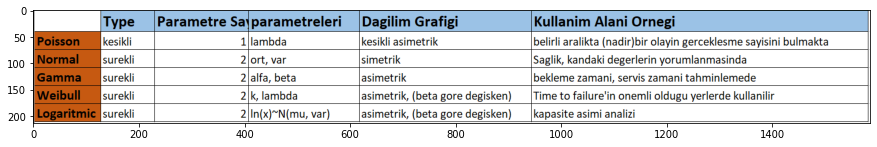

In [23]:
from skimage import io
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 15))

table = "https://user-images.githubusercontent.com/70684994/136443950-dcd8fae9-dcb2-4544-b8cb-94bc9da3fe14.png"

img = io.imread(table)

plt.imshow(img)